In [4]:
import pandas as pd
import re
import ast

from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import font_manager
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 1: Load the data 載入資料</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Dataset Information 資料集資訊</div>

# PTT AI 討論資料集介紹

## 資料集概覽

此資料集包含有關 AI 的討論，收集自台灣的社群媒體平台 PTT。資料收集範圍從 2022 年 1 月 1 日到 2024 年 5 月 31 日，共包含 2,172 筆資料。

## 資料欄位說明

資料集包含以下 11 個欄位：

1. `system_id`: 系統編號，總共 2172 筆，無空值。
2. `artComment`: 文章評論，總共 2172 筆，無空值。
3. `artDate`: 文章日期，總共 2172 筆，無空值。
4. `insertedDate`: 插入日期，總共 2172 筆，無空值。
5. `artContent`: 文章內容，總共 2172 筆，無空值。
6. `artCatagory`: 文章類別，總共 2172 筆，無空值。
7. `dataSource`: 資料來源，總共 2172 筆，無空值，全部來自 PTT。
8. `artPoster`: 發文者，總共 2172 筆，無空值。
9. `artTitle`: 文章標題，總共 2172 筆，無空值。
10. `artUrl`: 文章網址，總共 2172 筆，無空值。

## 記憶體使用情況

- 資料集大小： 186.8+ KB
- 資料型態：整數 (int64) 1 欄，物件 (object) 9 欄

In [2]:
df = pd.read_csv('data/ptt_ai_221130to240531.csv')
df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,ggglu,Finance,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""cow38"", ""cmt...",118.168.142.101,2022-02-16 00:12:45,ptt
1,2,https://www.ptt.cc/bbs/Finance/M.1653071365.A....,[新聞]台銀「三駕馬車」戰略發威前4月,2022-05-21 02:29:23,make1302,Finance,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\r\n，董...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""DerLuna"", ""c...",118.171.234.47,2022-05-22 01:11:41,ptt
2,3,https://www.ptt.cc/bbs/Finance/M.1676346325.A....,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,kria5304,Finance,https://tinyurl.com/3fcp6ehh\r\n記者陳美君／台北報導\r\n...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""fill725258"",...",36.224.200.45,2023-02-15 01:06:37,ptt
3,4,https://www.ptt.cc/bbs/Finance/M.1698684536.A....,[新聞]證交所徵才開創數位驅動時代報名至11/17,2023-10-31 00:48:54,BangBang5566,Finance,證交所徵才開創數位驅動時代 報名至11/17止\r\n\r\n中央社\r\n2023年10月...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Laviathan"", ...",42.70.143.5,2023-10-31 01:10:55,ptt
4,5,https://www.ptt.cc/bbs/job/M.1641165773.A.E67....,[台中][西屯］飛斯戴爾有限公司/日文客服,2022-01-03 07:22:51,howdigh,job,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],125.230.247.67,2022-01-04 00:58:48,ptt


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system_id     2172 non-null   int64 
 1   artUrl        2172 non-null   object
 2   artTitle      2172 non-null   object
 3   artDate       2172 non-null   object
 4   artPoster     2172 non-null   object
 5   artCatagory   2172 non-null   object
 6   artContent    2172 non-null   object
 7   artComment    2172 non-null   object
 8   e_ip          2126 non-null   object
 9   insertedDate  2172 non-null   object
 10  dataSource    2172 non-null   object
dtypes: int64(1), object(10)
memory usage: 186.8+ KB


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the font 載入字型</div>

In [45]:
# Path to the custom font
font_path = 'font/TraditionalChinese.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Noto Sans TC


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 2: Data Preprocessing 資料前處理</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Data Cleaning 資料清理</div>

In [13]:
# 複製原始資料集
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artUrl', 'artPoster', 'artCatagory', 'artComment', 'insertedDate', 'dataSource', 'e_ip']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

,artTitle,artDate,artContent,sentence
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,【實習】\r，【公司名稱】Influx FinTech 普匯金融科技\r，\r，【工作職缺】...
1,[新聞]台銀「三駕馬車」戰略發威前4月,2022-05-21 02:29:23,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\r\n，董...,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\r，，董事...
2,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\r\n記者陳美君／台北報導\r\n...,\r，記者陳美君／台北報導\r，2023年2月14日 週二 上午6:32\r，擁抱「金」飯碗...
3,[新聞]證交所徵才開創數位驅動時代報名至11/17,2023-10-31 00:48:54,證交所徵才開創數位驅動時代 報名至11/17止\r\n\r\n中央社\r\n2023年10月...,證交所徵才開創數位驅動時代 報名至11/17止\r，\r，中央社\r，2023年10月30日...
4,[台中][西屯］飛斯戴爾有限公司/日文客服,2022-01-03 07:22:51,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
5,[台北]國立臺灣師範大學教育部計畫專任助理,2022-01-05 15:59:05,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
6,[北部]林口長庚醫院醫療AI中心誠徵統計分析助理,2022-01-13 14:05:16,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
7,[台北]國立臺灣師範大學教育部計畫專任助理,2022-01-17 09:28:27,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
8,[台北]三軍總醫院AIoT中心誠徵博士級研究員,2022-01-20 16:52:39,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
9,"[台北]4w+薪商標專利業務行銷撰稿,專利師",2022-01-21 18:30:13,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Tokenization Sentence 斷句</div>

In [14]:
# 去除一些不需要的欄位
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")
meta_data = clear_df.explode('sentence').reset_index(drop=True)

meta_data['sentence'] = meta_data['sentence'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '',x))

meta_data.head()

,artTitle,artDate,artContent,sentence
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,實習
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,公司名稱普匯金融科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,
3,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,工作職缺
4,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,徵求條件


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Setup NER Model 設定 NER 模型</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the NER Model 載入 NER 模型</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Initialize the CKIP NLP Tool 初始化 CKIP NLP 工具</div>

In [20]:
# 初始化 ckip 工具
ws_driver  = CkipWordSegmenter(model_name="ckiplab/bert-base-chinese-ws", device=0)
pos_driver = CkipPosTagger(model_name="ckiplab/bert-base-chinese-pos", device=0)
ner_driver = CkipNerChunker(model_name="ckiplab/bert-base-chinese-ner", device=0)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">NER Prediction NER 預測</div>

In [22]:
text = meta_data['sentence'].tolist()

# 執行
ws = ws_driver(text)
pos = pos_driver(ws)
ner = ner_driver(text)

Inference: 100%|██████████| 651/651 [04:09<00:00,  2.61it/s]


In [23]:
# 將斷詞以及 pos 結果合在一起顯示
def pack_ws_pos_sentence(sentence_ws, sentence_pos):
   assert len(sentence_ws) == len(sentence_pos)
   res = []
   for word_ws, word_pos in zip(sentence_ws, sentence_pos):
      res.append(f"{word_ws}({word_pos})")
   return "\u3000".join(res)

sentences, packed_sentences, entities = [], [], []
# 儲存結果
for sentence, sentence_ws, sentence_pos, sentence_ner in zip(text, ws, pos, ner):
   sentences.append(sentence)
   packed_sentences.append(pack_ws_pos_sentence(sentence_ws, sentence_pos))
   entities.append([str(entity) for entity in sentence_ner])

# 將結果存在一個 dataframe 中
ner_results = pd.DataFrame({
   'sentence': sentences,
   'packed_sentence': packed_sentences,
   'entities': entities
})

ner_results.head()

,sentence,packed_sentence,entities
0,實習,實習(VA),[]
1,公司名稱普匯金融科技,公司(Nc) 名稱(Na) 普匯(Nb) 金融(Na) 科技(Na),"[NerToken(word='普匯金融科技', ner='ORG', idx=(4, 10))]"
2,,,[]
3,工作職缺,工作(Na) 職缺(Na),[]
4,徵求條件,徵求(VC) 條件(Na),[]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Remove the empty sentence 移除空句子</div>

In [27]:
ner_results = ner_results[ner_results['sentence'] != '']
ner_results.head()

,sentence,packed_sentence,entities
0,實習,實習(VA),[]
1,公司名稱普匯金融科技,公司(Nc) 名稱(Na) 普匯(Nb) 金融(Na) 科技(Na),"[NerToken(word='普匯金融科技', ner='ORG', idx=(4, 10))]"
3,工作職缺,工作(Na) 職缺(Na),[]
4,徵求條件,徵求(VC) 條件(Na),[]
5,商管相關科系或曾經接觸相關領域,商管(Na) 相關(VH) 科系(Na) 或(Caa) 曾經(D) 接觸(VC) 相關(VH...,[]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Save the NER Results 儲存 NER 結果</div>

In [29]:
ner_results.to_csv('data/ner_results.csv', index=False)

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Parse NER and POS Results 解析 NER 和 POS 結果</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the NER Results 載入 NER 結果</div>

In [65]:
ner_results = pd.read_csv('data/ner_results.csv')
ner_results.head()

,sentence,packed_sentence,entities
0,實習,實習(VA),[]
1,公司名稱普匯金融科技,公司(Nc) 名稱(Na) 普匯(Nb) 金融(Na) 科技(Na),"[""NerToken(word='普匯金融科技', ner='ORG', idx=(4, 1..."
2,工作職缺,工作(Na) 職缺(Na),[]
3,徵求條件,徵求(VC) 條件(Na),[]
4,商管相關科系或曾經接觸相關領域,商管(Na) 相關(VH) 科系(Na) 或(Caa) 曾經(D) 接觸(VC) 相關(VH...,[]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Parse the packed_sentence 解析 packed_sentence</div>

In [66]:
tqdm.pandas()

# Define a function to split the packed_sentence into word and pos
def split_packed_sentence(packed_sentence):
    words, pos_tags = [], []
    for token in packed_sentence.split('　'):
        word, pos = token.rsplit('(', 1)
        pos = pos.rstrip(')')
        words.append(word)
        pos_tags.append(pos)
    return words, pos_tags

# Apply the function to split the packed_sentence
ner_results[['words', 'pos_tags']] = ner_results['packed_sentence'].progress_apply(lambda x: pd.Series(split_packed_sentence(x)))

# Explode the lists to create a row for each word-pos pair
exploded_data = ner_results[['sentence', 'words', 'pos_tags']].explode(['words', 'pos_tags'])

# Rename columns for clarity
exploded_data = exploded_data.rename(columns={'words': 'word', 'pos_tags': 'pos'})

100%|██████████| 166407/166407 [00:08<00:00, 19188.94it/s]


In [67]:
exploded_data.head()

,sentence,word,pos
0,實習,實習,VA
1,公司名稱普匯金融科技,公司,Nc
1,公司名稱普匯金融科技,名稱,Na
1,公司名稱普匯金融科技,普匯,Nb
1,公司名稱普匯金融科技,金融,Na


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Parse the entities 解析 entities</div>

In [68]:
# Function to extract words and their NER tags from the given example
def extract_words_and_ner(row):
    sentence = row['sentence']
    packed_sentence = row['packed_sentence']
    entities_str = row['entities']
    
    words = [token.rsplit('(', 1)[0] for token in packed_sentence.split('　')]
    entity_tuples = []
    
    if entities_str and entities_str != "[]":
        try:
            entity_list = ast.literal_eval(entities_str)
            for entity in entity_list:
                # Manually parse the entity string
                start_idx = entity.find("word='") + len("word='")
                end_idx = entity.find("', ner='")
                word = entity[start_idx:end_idx]
                
                start_ner_idx = entity.find("ner='") + len("ner='")
                end_ner_idx = entity.find("', idx=")
                ner = entity[start_ner_idx:end_ner_idx]
                
                entity_tuples.append((sentence, word, ner))
        except (ValueError, SyntaxError):
            pass
    
    return entity_tuples

# Apply the function to extract words and NER tags for each row
extracted_data = []
for _, row in tqdm(ner_results.iterrows(), total=len(ner_results)):
    extracted_data.extend(extract_words_and_ner(row))

# Create a new DataFrame with the extracted data
ner_extracted_df = pd.DataFrame(extracted_data, columns=['sentence', 'word', 'ner'])

100%|██████████| 166407/166407 [00:03<00:00, 41801.69it/s]


In [69]:
ner_extracted_df.head()

,sentence,word,ner
0,公司名稱普匯金融科技,普匯金融科技,ORG
1,工作地點台北市中山區松江路號樓之,台北市,GPE
2,工作地點台北市中山區松江路號樓之,松江路,LOC
3,工作時間一週三天可議午休一小時,一週三天,DATE
4,工作時間一週三天可議午休一小時,一小時,TIME


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 4: Data Analysis 資料分析</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">NER Categories NER 類別</div>

In [70]:
ner_count = pd.DataFrame(ner_extracted_df['ner'].value_counts())
ner_count.reset_index(inplace=True)

ner_count.columns = ['ner', 'count']
ner_count

,ner,count
0,ORG,18727
1,GPE,13075
2,DATE,12801
3,PERSON,11066
4,CARDINAL,5554
5,MONEY,4063
6,ORDINAL,1928
7,NORP,1410
8,LOC,961
9,TIME,724


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Plot the NER Categories 繪製 NER 類別</div>

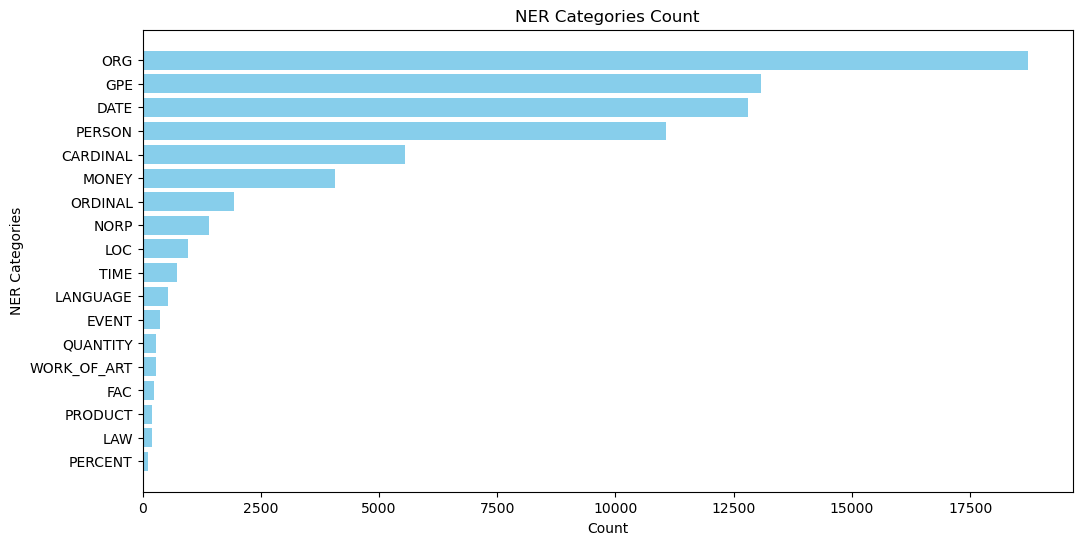

In [41]:
# 繪製 NER 類別
plt.figure(figsize=(12, 6))
plt.barh(ner_count['ner'], ner_count['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('NER Categories')
plt.title('NER Categories Count')
plt.gca().invert_yaxis()
plt.show()

### NER 類別計數分析

1. 主要類別：
    - ORG（組織）：最常被提及的實體，表明討論中涉及大量關於公司、機構或其他與AI相關的組織。
    - GPE（地理政治實體）：頻繁提及，反映出討論涉及國家、城市或地區，這些地方與AI的發展息息相關。
    - DATE（日期）：經常提及特定日期，這表明討論內容可能涉及AI相關的事件、發佈或時間表。
    - PERSON（人物）：多次提及個人，表明討論涉及AI領域的重要人物，如研究人員、CEO或有影響力的發言人。

2. 中等頻率：
    - CARDINAL（基數）：討論中使用的數字，反映出AI討論中涉及大量的統計、測量或計數內容。
    - MONEY（金額）：提及財務數字，表示討論中涉及AI項目的資金、投資或成本。
    - ORDINAL（序數）：顯示排名或排序的重要性，反映出AI討論中的序列或順序。

3. 較少提及的類別：
    - NORP（民族、宗教或政治團體）：涉及特定群體或社群，與AI討論相關。
    - LOC（地點）：未在GPE中涵蓋的特定地點，顯示與AI相關活動的地點。
    - TIME（時間）：特定時間，反映AI相關活動或事件的時間。

4. 少量提及的類別：
    - LANGUAGE（語言）、EVENT（事件）、QUANTITY（數量）、WORK_OF_ART（藝術品）、FAC（設施）、PRODUCT（產品）、LAW（法律）、PERCENT（百分比）：這些類別提及次數較少，但在AI討論中仍具有特定的相關性，例如AI系統使用的語言、特定事件、數量及法律或藝術方面的內容。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Organize the NER Results 組織 NER 結果</div>

In [42]:
# 篩選 NER 為 'ORG' 的資料
filter_ner = ['ORG']
org_data = ner_extracted_df[ner_extracted_df['ner'].isin(filter_ner)]
org_data.head()

,sentence,word,ner
0,公司名稱普匯金融科技,普匯金融科技,ORG
6,合作台大兒童健康基金會並由張鈞甯擔任公益大使舉辦聯合勸募捐款社會公益,合作台大兒童健康基金會,ORG
8,中央社記者張璦台北日電台灣銀行消金企金政府部門業務三駕馬車再發威,中央社,ORG
11,中央社記者張璦台北日電台灣銀行消金企金政府部門業務三駕馬車再發威,台灣銀行,ORG
14,台銀今年前月稅前淨利達新台幣億元,台銀,ORG


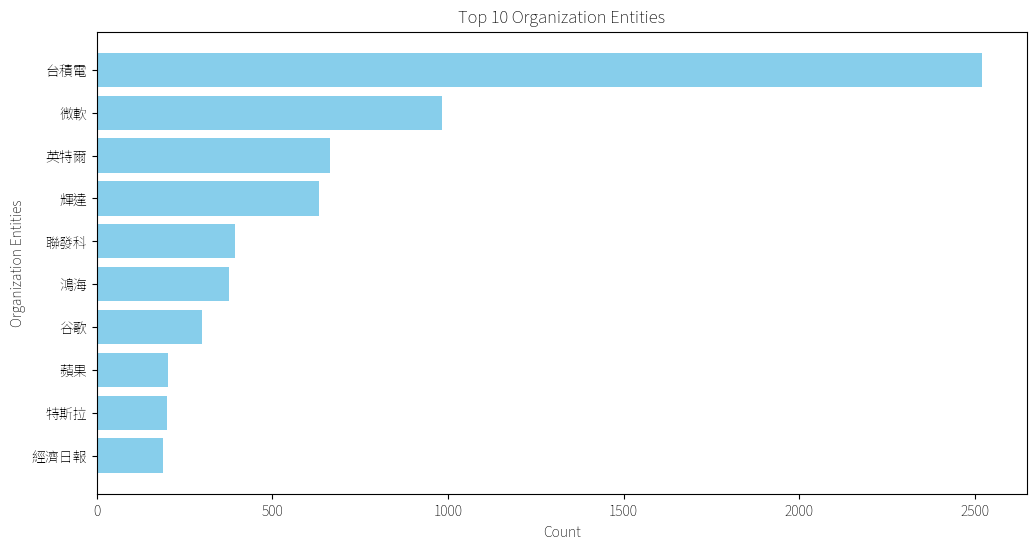

In [50]:
# 視覺化組織實體
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(org_data['word'].value_counts().index[:10], org_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Organization Entities')
plt.title('Top 10 Organization Entities')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名組織實體

1. 台積電：
    - 分析：台積電是全球最大的半導體製造公司之一，在AI硬體領域中扮演著關鍵角色。它的高頻提及顯示出在AI討論中，與半導體技術的相關性和重要性。
    - 影響：台積電的技術創新和製造能力對AI芯片的發展至關重要，討論可能涉及其技術突破、新產品發佈或市場動向。

2. 微軟：
    - 分析：微軟是全球領先的科技公司之一，其在AI軟體和雲端服務領域的投入和創新廣為人知。它的頻繁出現顯示出其在AI領域的顯著影響力。
    - 影響：討論可能涵蓋微軟的AI平台、工具、研究計劃及與其他企業的合作。

3. 英特爾：
    - 分析：作為主要的半導體公司之一，英特爾在AI硬體領域中也占有重要地位。它的提及反映了其在推動AI計算能力方面的貢獻。
    - 影響：討論可能涉及英特爾的新技術、處理器產品或在AI領域的戰略部署。

4. 輝達（NVIDIA）：
    - 分析：輝達以其GPU技術聞名，對AI和深度學習的發展起到了至關重要的作用。其頻繁被提及表明其技術在AI應用中的核心地位。
    - 影響：討論可能涉及其GPU技術、AI開發平台（如CUDA）及其在各種AI應用中的使用。

5. 聯發科：
    - 分析：聯發科是知名的晶片製造商，其產品廣泛應用於各種消費電子設備。其在AI討論中的出現表明其技術在相關應用中的重要性。
    - 影響：討論可能涵蓋聯發科的AI晶片、技術創新及其市場競爭力。

6. 鴻海：
    - 分析：鴻海科技集團是全球最大的電子製造服務提供商，與AI相關的製造和技術研發也受到關注。
    - 影響：討論可能涉及其在AI硬體製造、工業自動化及相關合作上的貢獻。

7. 谷歌：
    - 分析：谷歌是全球領先的科技公司之一，在AI研究和應用上都處於領先地位。其被提及次數雖未進前十，但其重要性不容忽視。
    - 影響*：討論可能涵蓋谷歌的AI研究、技術應用及其在推動AI發展上的重要舉措。

8. 蘋果：
    - 分析：蘋果公司以其創新產品和技術著稱，在AI應用（如Siri、Face ID等）方面也有顯著貢獻。
    - 影響：討論可能集中在蘋果的AI技術整合及其對消費者市場的影響。

9. 特斯拉：
    - 分析：特斯拉在自動駕駛和電動車領域的技術創新引人注目，這在AI討論中也是一個重要話題。
    - 影響：討論可能涉及特斯拉的自動駕駛技術、AI芯片及其在汽車行業中的領導地位。

10. 經濟日報：
    - 分析：經濟日報作為一家主要的財經媒體，其報導內容可能對AI領域的資訊傳播和輿論影響起到重要作用。
    - 影響：討論可能包括該媒體對AI技術、企業動向及市場趨勢的報導。

### 缺失的英文組織

在此圖表中，部分重要的英文名稱組織如OpenAI和Google等未能列出，可能是因為CKIP Transformer模型對中文識別效果較好，但對英文名稱識別存在不足。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">PERSON Entities 人物實體</div>

In [51]:
# 篩選 NER 為 'PERSON' 的資料
filter_ner = ['PERSON']
person_data = ner_extracted_df[ner_extracted_df['ner'].isin(filter_ner)]
person_data.head()

,sentence,word,ner
7,合作台大兒童健康基金會並由張鈞甯擔任公益大使舉辦聯合勸募捐款社會公益,張鈞甯,PERSON
9,中央社記者張璦台北日電台灣銀行消金企金政府部門業務三駕馬車再發威,張璦,PERSON
12,董事長呂桔誠今天表示,呂桔誠,PERSON
21,呂桔誠總統府資政陳,呂桔誠,PERSON
22,博志等人出席,博志,PERSON


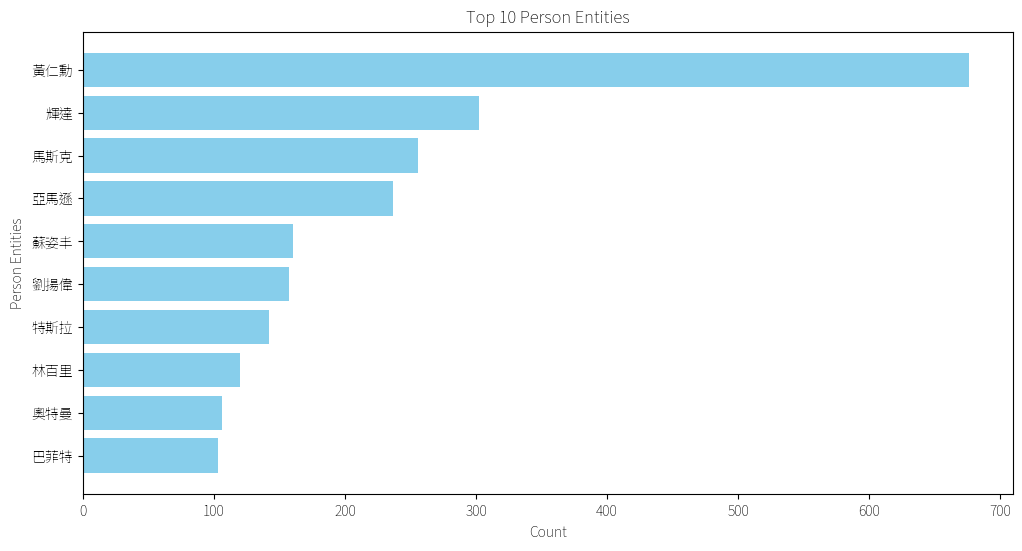

In [52]:
# 視覺化人物實體
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(person_data['word'].value_counts().index[:10], person_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Person Entities')
plt.title('Top 10 Person Entities')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名人物實體

1. 黃仁勳：
    - 分析：黃仁勳是 NVIDIA 的創辦人兼 CEO，他在 AI 領域中扮演著至關重要的角色。NVIDIA 的 GPU 技術對 AI 和深度學習的發展起到了巨大推動作用。
    - 影響：討論可能涉及他在 AI 領域的技術貢獻、公司戰略及未來規劃。

2. 輝達（NVIDIA）：
    - 分析：輝達是全球領先的 GPU 製造商，其技術對於深度學習和 AI 的計算能力至關重要。這顯示出在 AI 討論中，輝達的技術和產品受到高度關注。
    - 影響：討論可能涉及輝達的 GPU 技術、AI 平台（如 CUDA）、技術創新以及市場競爭力。
    - 備註：輝達被誤認為是人物實體，實際上是組織實體。

3. 馬斯克：
    - 分析：埃隆·馬斯克（Elon Musk）是多家科技公司的創辦人，包括特斯拉和 SpaceX。他在 AI 領域尤其是自動駕駛技術方面有著重要影響。
    - 影響：討論可能集中在他對 AI 發展的看法、技術創新以及在相關公司的動向。

4. 亞馬遜：
    - 分析：亞馬遜在 AI 技術應用、雲端服務和智能助理（如 Alexa）方面有著重要的地位，顯示出其在 AI 討論中的重要性。
    - 影響：討論可能涉及亞馬遜的 AI 技術應用、AWS 服務及市場策略。
    - 備註：亞馬遜被誤認為是人物實體，實際上是組織實體。

5. 薩提亞·納德拉：
    - 分析：薩提亞·納德拉（Satya Nadella）是微軟的現任 CEO，在他的領導下，微軟在 AI 領域取得了顯著的進展。
    - 影響：討論可能涉及微軟的 AI 技術、產品發佈及市場策略。

6. 劉揚偉：
    - 分析：劉揚偉是鴻海科技集團（富士康）的董事長，他在 AI 技術和製造業自動化方面有重要影響。
    - 影響：討論可能涉及鴻海在 AI 領域的投資、技術應用及未來發展。

7. 特斯拉：
    - 分析：特斯拉在自動駕駛和電動車領域的創新使其在 AI 討論中頻繁出現。
    - 影響：討論可能涉及特斯拉的自動駕駛技術、AI 芯片及其在汽車行業中的領導地位。
    - 備註：特斯拉被誤認為是人物實體，實際上是組織實體。 

8. 林百里：
    - 分析：林百里是廣達電腦的創辦人及董事長，廣達在 AI 硬體和伺服器市場有重要地位。
    - 影響：討論可能涉及廣達的 AI 產品、技術創新及市場表現。

9. 奧特曼：
    - 分析：奧特曼可能是指 Sam Altman，他是 OpenAI 的 CEO，對 AI 技術和倫理有深刻見解。
    - 影響：討論可能涉及 OpenAI 的技術突破、研究方向及 AI 倫理問題。

10. 巴菲特：
    - 分析：沃倫·巴菲特（Warren Buffett）是著名的投資者，他的意見在科技和 AI 投資方面具有影響力。
    - 影響：討論可能涉及巴菲特對 AI 公司的投資和市場預測。

#### 組織被誤判為人物
在分析過程中，我們發現輝達（NVIDIA）、亞馬遜（Amazon）和特斯拉（Tesla）這些組織實體被誤判為人物實體。這反映 CKIP Transformer 模型在識別專有名詞時可能存在一定的誤差，需要進一步改進。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Event Entities 事件實體</div>

In [79]:
# 篩選 NER 為 'EVENT' 的資料
filter_ner = ['EVENT']
event_data = ner_extracted_df[ner_extracted_df['ner'].isin(filter_ner)]
event_data.head()

,sentence,word,ner
1276,二計畫工作會議出席,二計畫工作會議,EVENT
1409,二計畫工作會議出席,二計畫工作會議,EVENT
4234,三利多救台股抗疫情壓力,三利多,EVENT
4237,三利多救台股抗疫情壓力,三利多,EVENT
4241,三利多救台股抗疫情壓力,三利多,EVENT


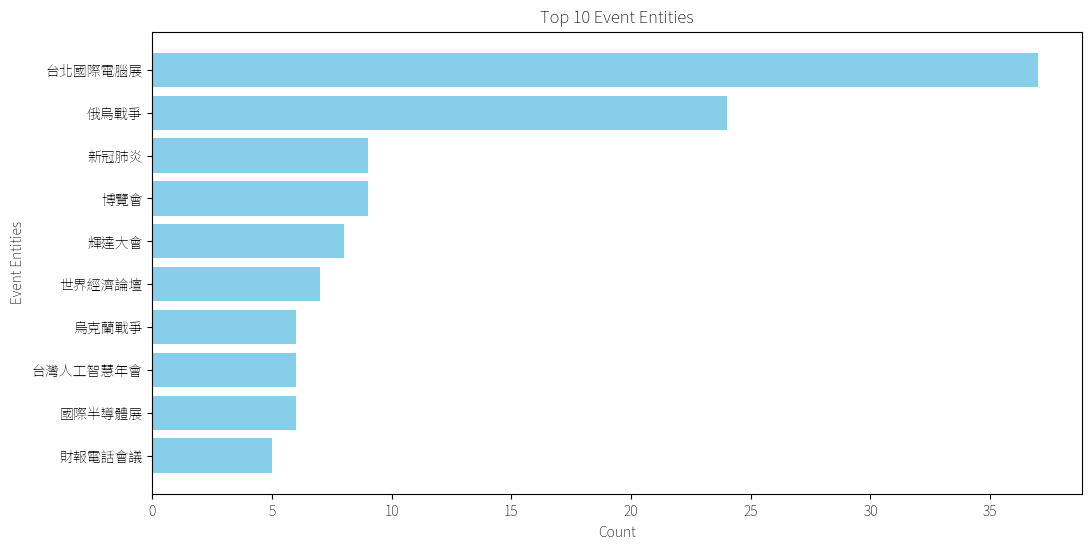

In [80]:
# 視覺化事件實體
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(event_data['word'].value_counts().index[:10], event_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Event Entities')
plt.title('Top 10 Event Entities')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名事件實體

1. 台北國際電腦展：
    - 分析：台北國際電腦展（COMPUTEX TAIPEI）是全球領先的電腦和科技展覽會，每年吸引眾多科技公司和專業人士參與。它是展示最新科技和創新產品的重要平台。
    - 影響：討論可能涉及展覽會上展示的最新 AI 技術和產品，以及各大公司的參展情況和技術展示，反映出 AI 行業的最新動態和趨勢。

2. 俄烏戰爭：
    - 分析：俄烏戰爭是一個全球性重大事件，對各行各業，包括科技和 AI 領域，都產生了深遠影響。戰爭引發的地緣政治緊張和經濟制裁，對科技供應鏈和技術合作產生了影響。
    - 影響：討論可能涉及戰爭對 AI 技術研發和應用的影響，例如供應鏈中斷、技術封鎖和全球科技合作的變化。

3. 新冠肺炎：
    - 分析：新冠肺炎疫情是近年來最大的全球健康危機，對各行各業都產生了深遠影響。AI 技術在疫情防控、疫苗研發和醫療服務中的應用備受關注。
    - 影響：討論可能集中在 AI 如何幫助應對疫情，包括疫情預測、患者跟踪、醫療診斷和疫苗研發等方面的應用。

4. 博弈會：
    - 分析：博弈會可能指的是相關行業的展覽會或研討會，這些活動通常聚焦於遊戲和賭博行業中的最新技術和趨勢。
    - 影響：討論可能涉及 AI 在遊戲開發、自動化賭博系統以及虛擬現實等領域的應用。

5. 輝達大會：
    - 分析：輝達大會（NVIDIA GTC）是 NVIDIA 主辦的技術大會，專注於 GPU 技術和 AI 的最新進展。這是展示 AI 研究成果和應用的重要平台。
    - 影響：討論可能集中在輝達在大會上發佈的新技術、新產品以及 AI 研究的新方向，反映出業界對 GPU 技術和 AI 應用的重視。

6. 世界經濟論壇：
    - 分析：世界經濟論壇（WEF）是全球領先的經濟會議，討論全球經濟和科技的未來走向。AI 技術是其中的重要話題之一。
    - 影響：討論可能涉及論壇中對 AI 技術的討論，特別是 AI 對全球經濟、就業和倫理問題的影響。

7. 烏克蘭戰爭：
    - 分析：與俄烏戰爭重複，這再次表明該事件的重要性和影響力。
    - 影響：同上，討論可能涉及戰爭對 AI 技術研發和應用的影響。

8. 台灣人工智慧年會：
    - 分析：台灣人工智慧年會是本地重要的 AI 行業會議，專注於 AI 技術的發展和應用。
    - 影響：討論可能涉及會議中的技術分享、研究成果展示以及行業趨勢的討論。

9. 國際半導體展：
    - 分析：國際半導體展（Semicon）是全球主要的半導體行業展覽會，展示最新的半導體技術和產品。
    - 影響：討論可能涉及展覽會上的技術創新、產品展示以及半導體技術對 AI 發展的推動作用。

10. 財報電話會議：
    - 分析：財報電話會議是企業發布財務業績和展望的重要渠道。這些會議通常涉及公司對 AI 技術投資和應用的討論。
    - 影響：討論可能涉及企業在財報中對 AI 項目的投資、技術進展以及未來的發展規劃。

#### 重複事件名稱

雖然有些事件如「烏克蘭戰爭」和「俄烏戰爭」在本質上是同一事件，但由於命名實體識別過程中的重複或不同表述，可能導致數據中的多次計數。

### 取代「烏克蘭戰爭」為「俄烏戰爭」

In [85]:
# 取代「烏克蘭戰爭」為「俄烏戰爭」、「烏俄戰爭」為「俄烏戰爭」
event_data.loc[event_data['word'] == '烏克蘭戰爭', 'word'] = '俄烏戰爭'
event_data.loc[event_data['word'] == '烏俄戰爭', 'word'] = '俄烏戰爭'

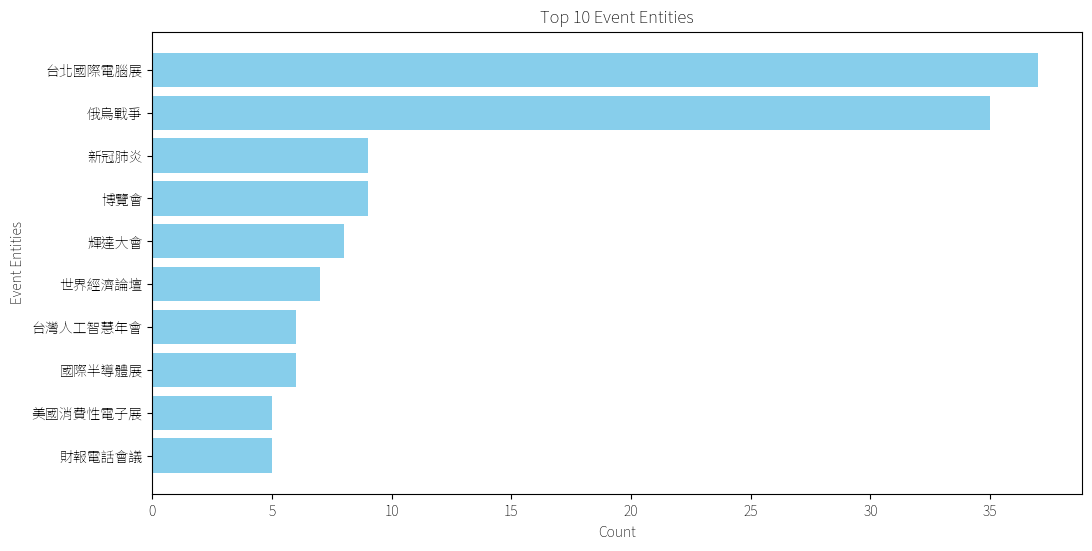

In [86]:
# 視覺化合併後的事件實體
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(event_data['word'].value_counts().index[:10], event_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Event Entities')
plt.title('Top 10 Event Entities')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名事件實體（合併後）

我們可以看到俄烏戰爭（Ukraine-Russia War）在事件實體中佔據了第二名，這表明這一事件在 AI 討論中具有重要性。其他事件如台北國際電腦展（COMPUTEX TAIPEI）、新冠肺炎（COVID-19）和世界經濟論壇（WEF）也受到關注，反映出 AI 技術和全球事件之間的密切聯繫。

此外有新的事件實體「美國消費性電子展」（CES）進入前十名，這表明消費性電子產品和 AI 技術的結合受到關注，展示了 AI 在消費市場中的應用和影響，也說明有不少人有討論到國際性的事件。

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 5: POS Analysis 詞性分析</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">POS Categories 詞性類別</div>

In [89]:
pos_count = pd.DataFrame(exploded_data['pos'].value_counts())
pos_count.reset_index(inplace=True)
pos_count.columns = ['pos', 'count']
pos_count

,pos,count
0,Na,260884
1,VC,86245
2,D,77603
3,VH,57294
4,DE,47542
5,Nc,46297
6,P,45155
7,Nb,31501
8,VE,27162
9,Nf,26411


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Plot the POS Categories 繪製詞性類別</div>

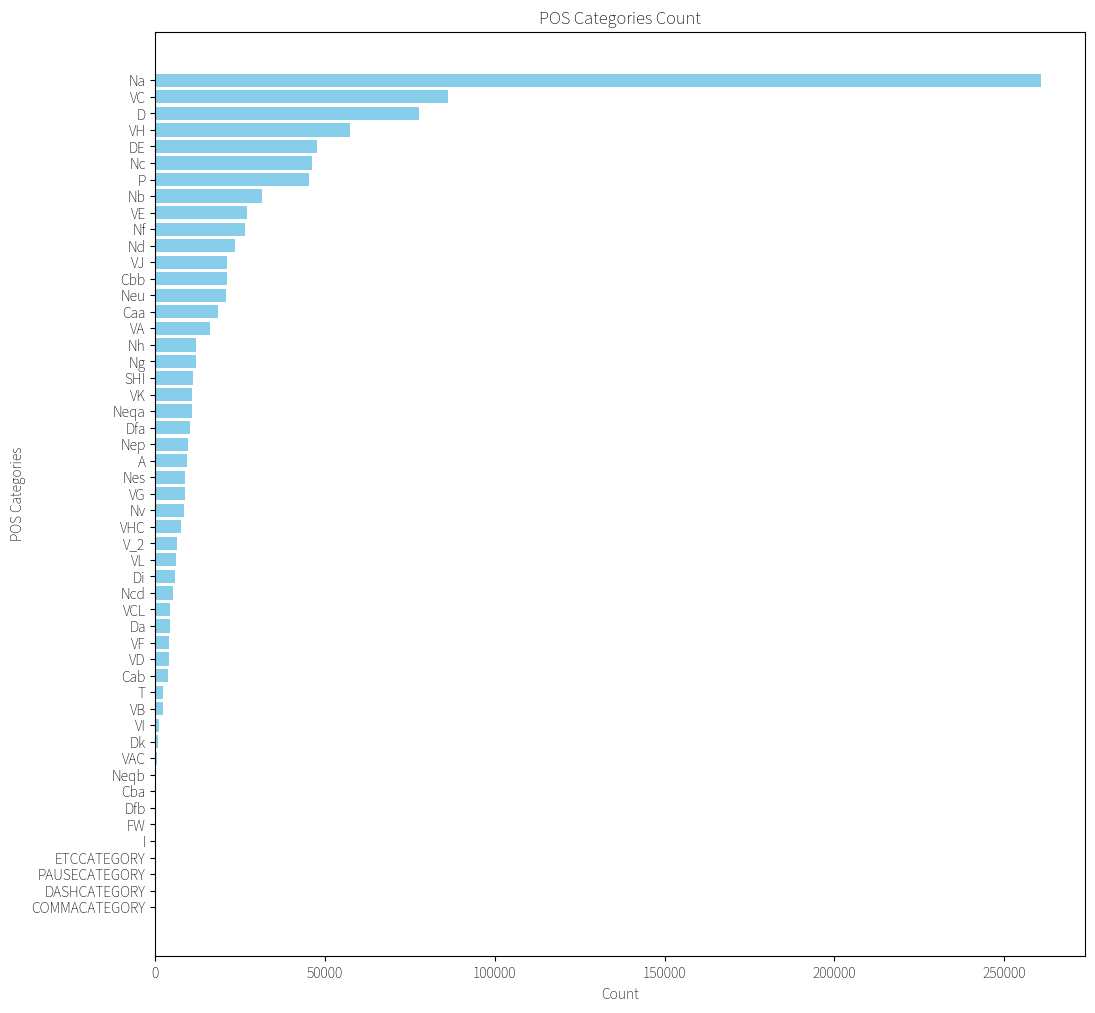

In [92]:
# 繪製詞性類別
plt.figure(figsize=(12, 12))
plt.barh(pos_count['pos'], pos_count['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('POS Categories')
plt.title('POS Categories Count')
plt.gca().invert_yaxis()
plt.show()

### POS (Part-of-Speech) 前十名分析

以下是對於POS標記前十名及其對應詞彙數量的詳細分析：

1. Na（普通名詞）：
    - 數量：260,884
    - 分析：普通名詞的高頻出現反映了討論中涉及大量具體事物、概念和主題。這些名詞包括具體的物體、場所、組織等。
    - 影響：名詞的頻繁使用有助於確定討論的核心話題和焦點，有助於理解文本的主要內容和關注點。

2. VC（及物動詞）：
    - 數量：86,245
    - 分析：及物動詞用於描述具體的動作和行為，通常後接受詞。高頻的VC表明討論中存在大量的具體行動描述。
    - 影響：分析及物動詞可以了解討論中的主要活動、操作及其對象，有助於理解討論的動態過程。

3. D（副詞）：
    - 數量：77,603
    - 分析：副詞用於修飾動詞、形容詞或其他副詞，提供更多細節和語氣。高頻副詞表明討論中對行動和性質的詳細描述。
    - 影響：副詞的使用可以揭示出討論的細節程度和語氣，幫助更準確地理解文本的語義。

4. VH（形容詞）：
    - 數量：57,294
    - 分析：形容詞用於修飾名詞，提供有關事物的性質、狀態或特徵的描述。高頻形容詞表明討論中對事物特徵的重視。
    - 影響：形容詞的使用可以揭示出討論中對不同事物的評價和看法，有助於理解文本的態度和觀點。

5. DE（結構助詞）：
    - 數量：47,542
    - 分析：結構助詞「的」用於連接名詞和修飾語，是漢語中最常見的結構詞之一。高頻出現表明句子結構中的常見用法。
    - 影響：結構助詞的使用有助於理解句子的結構和組成部分，有助於解析句子的語法關係。

6. Nc（專有名詞）：
    - 數量：46,297
    - 分析：專有名詞指特定的事物或名稱，如地名、人名、品牌名等。高頻專有名詞反映了具體實體在討論中的重要性。
    - 影響：專有名詞的分析有助於識別討論中的主要實體和關鍵詞，理解討論的具體對象。

7. P（介詞）：
    - 數量：45,155
    - 分析：介詞用於表示名詞、代詞與句中其他詞的關係。高頻介詞表明討論中對事物之間關係的描述。
    - 影響：介詞的使用有助於理解句子中的邏輯和語義關係，解析句子的結構。

8. Nb（其他名詞）：
    - 數量：31,501
    - 分析：這類名詞包括量詞、單位等。高頻其他名詞表明討論中對計量、單位等方面的描述。
    - 影響：其他名詞的分析有助於理解文本中的計量單位和具體數值，提供詳細的語境信息。

9. VE（有詞）：
    - 數量：27,162
    - 分析：有詞如「有」表示存在、擁有等。高頻有詞表明討論中對存在狀態和擁有關係的描述。
    - 影響：有詞的使用有助於理解討論中的擁有關係和存在狀態，解析文本的語義結構。

10. Nf（時間名詞）：
    - 數量：26,411
    - 分析：時間名詞如「今天」、「明天」等，表示時間。高頻時間名詞表明討論中對時間的重視。
    - 影響：時間名詞的分析有助於理解討論的時間背景和事件發生的時間點，提供時間軸信息。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Noun Categories 名詞類別</div>

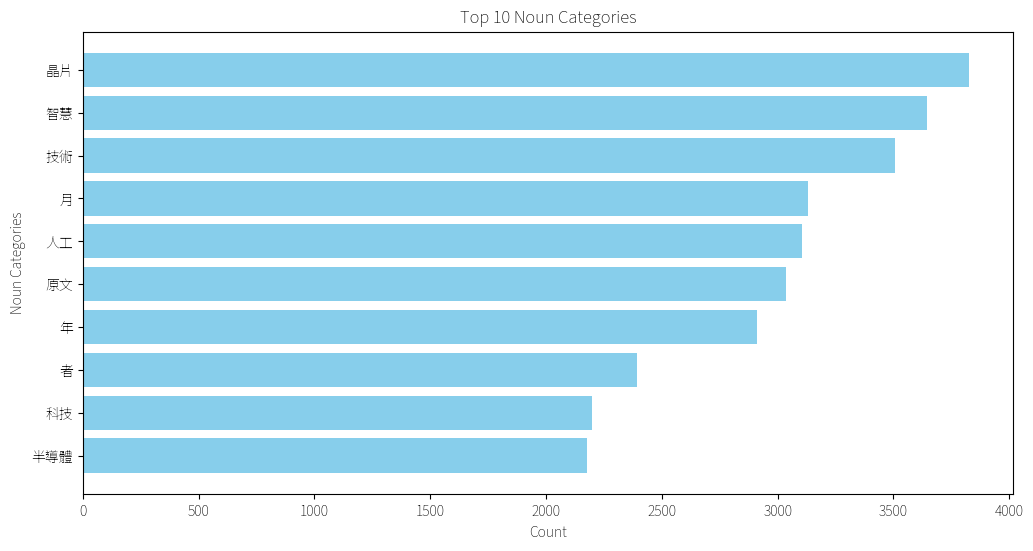

In [94]:
filter_pos = ['Na']
noun_data = exploded_data[exploded_data['pos'].isin(filter_pos)]

# 視覺化名詞類別
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(noun_data['word'].value_counts().index[:10], noun_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Noun Categories')
plt.title('Top 10 Noun Categories')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名名詞類別

我們可以看到「晶片」是名詞類別中出現頻率最高的詞彙，這表明在 AI 討論中晶片技術佔據了重要地位。其他常見名詞如「技術」、「科技」、「半導體」等也反映了 AI 領域的核心內容和關注點。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Verb Categories 動詞類別</div>

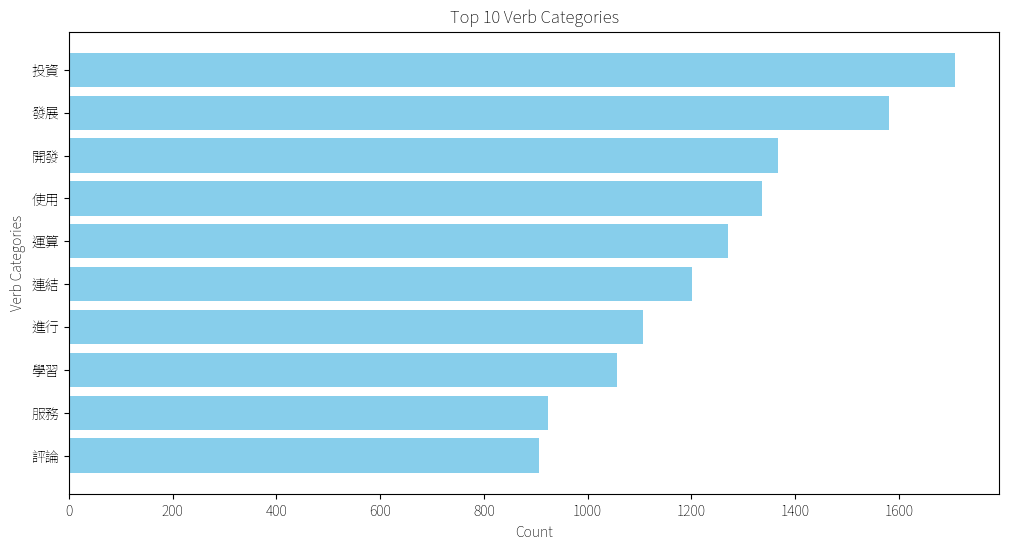

In [95]:
filter_pos = ['VC']
verb_data = exploded_data[exploded_data['pos'].isin(filter_pos)]

# 視覺化動詞類別
plt.rcParams['font.family'] = 'Noto Sans TC'
plt.figure(figsize=(12, 6))
plt.barh(verb_data['word'].value_counts().index[:10], verb_data['word'].value_counts()[:10], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Verb Categories')
plt.title('Top 10 Verb Categories')
plt.gca().invert_yaxis()
plt.show()

### 圖表分析：前十名動詞類別

在動詞類別中，「投資」是出現頻率最高的詞彙，這表明在 AI 討論中投資行為佔據了重要地位。其他常見動詞如「發展」、「開發」、「使用」則反應大眾對 AI 技術發展和應用的關注。

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 6: Conclusion 結論</div>

## 結論

通過對 AI 相關文本數據的 NER 和 POS 分析，我們可以獲得以下結論：

1. 組織實體：NVIDIA、Google、蘋果等組織在 AI 領域佔據重要地位，其技術和產品受到廣泛關注。
2. 人物實體：黃仁勳、馬斯克、薩提亞·納德拉等人物在 AI 領域具有重要影響力，其技術貢獻和觀點受到關注。
3. 事件實體：台北國際電腦展、俄烏戰爭、新冠肺炎等事件在 AI 討論中引起關注，反映出 AI 技術和全球事件之間的聯繫。
4. 詞性分析：普通名詞、及物動詞、副詞等詞性在討論中出現頻率較高，反映出討論的主題、行動和描述特徵。
5. 名詞類別：晶片、技術、科技等名詞在 AI 討論中出現頻率較高，反映出 AI 領域的核心內容和關注點。
6. 動詞類別：投資、發展、開發等動詞在 AI 討論中出現頻率較高，反映出對 AI 技術發展和應用的關注。